# What is Machine Learning?

## Traditional Software Development:
The input and the algorithm is known, and you write a function to produce an output
- Input data
- Apply logic to it
- Which produces a result

## Machine Learning
You know the input and the output, but you don't know the algorithm that creates the output given then input
- Take pairs of input and output data
- Figure out the algorithm

When training a neural network, the variables are never changed, only the weights and biases are. For example, converting celsius to fahrenheit the variable would be multiplication and addition and you would multiply the input by some number (the weight) and add another number (the bias). Training involves testing different correlated inputs and outputs and the weight and bias will be changed to fit to match the input and the output.

------

# Colab: Converting Celsius to Fahrenheit

The standard formula for converting celsius to fahrenheit is:

> F = C * 1.8 + 32

To train a network, instead of giving it the formula, we will feed it 5 corresponding inputs and outputs (for this example)

To setup and train the network, make a python file and import tensorflow and numpy.



In [8]:
import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

For this we will be doing supervised machine learning because we are trying to figure out an algorithm given a set of inputs and outputs


In [9]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38], dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100], dtype=float)

for i, c in enumerate(celsius_q):
    print(f'{c}\t degrees celsius = {fahrenheit_a[i]}')

-40.0	 degrees celsius = -40.0
-10.0	 degrees celsius = 14.0
0.0	 degrees celsius = 32.0
8.0	 degrees celsius = 46.0
15.0	 degrees celsius = 59.0
22.0	 degrees celsius = 72.0
38.0	 degrees celsius = 100.0



### Terminology for machine learning:
**Feature** - Input to our model  
**Label** - Output the model predicts  
**Example** - A pair of input and output that the model uses for training

For this example we will use a dense network because it is a simple example and a dense network is the most simple

When building a layer, **l0** in this case, we can instantiate it with **tf.keras.layersDense** and give it these configurations:

`input_shape[1]` - This specifies the input to this layer with a single value  
`units` - This specifies the number of neurons per layer. The number of neurons is the number of internal variables that the layer has to learn how to solve. This, for when it is the final layer, also defines the number of outputs. (In a multilayer model the size and shape of the layer needs to match the input_shape of the next layer)

In [10]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])


Once the layers are defines, they need to be assembled into a model.

A Sequential Model Definition takes a list of layers as an argument, specifying the calculation order from the input to the output.


In [11]:
model = tf.keras.Sequential([l0]) 

> Note: Most of the time the layer will be built and defines inside of the model rather than beforehand.

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

Before a model can get trained, it has to be compiled. When a model gets compiled it is given a loss and optimizer function

***`Loss`** Function* - A way of measuring the inaccuracy of the model  
**`Optimizer` Function** - A way to change the internal values fo increase accuracy and reduce loss

In [12]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

This is used for training, because, all training is, is calculate the inaccuracy then adjust to improve.

One part fo the optimizing function is the learning rate. This is the step size taken when adjusting values in the model. Too small and it will take too many iterations to be feasible. Too large and the model will be trained too inaccurately.

To train the model call the fit function.

When training happens, the model takes in the training inputs, celsius, and preforms calculations using the current internal variables, weights. At first the output is going to be random because the weight is randomly set. Then the loss is calculated and the optimizer directs how the weights should be adjusted.

The The cycle of calculate, compare, and adjust is controlled by the fit method. The first argument is the inputs, the second is desired outputs, the third is `epochs`, or the amount of times to run the same input through.

In [13]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print('Finished training the model')

Finished training the model


The fit method returns a history object which can be used to see if the history of the loss at the given epoch

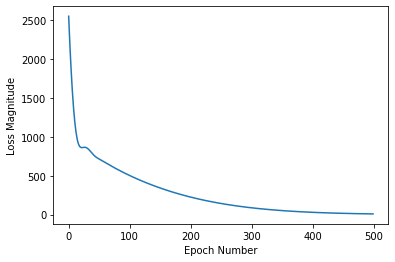

In [15]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

After the model has ben trained. It can be used to predict outputs given an input.

In [16]:
print(model.predict([100]))

[[211.32689]]


Given C * 1.8 + 32 = F where 100 * 1.8 + 32 = 212, our model is doing pretty good

### To Review:
- We created a model with a Dense Layer
- We trained it with 3500 examples (7 pairs, 500 epoches, 1 * 500 = 3500)

The model tuned the variables (weights) in the dense layer until it was able to mostly accurately convert celsius to fahrenheit

## Recap

The training process, what happens in the model.fit(...), is just about adjusting the internal variables of the network to the best values. This is achieved through an optimization process called Gradient Decent, which uses numeric analysis to find the best values

Gradient descent works by iteratively adjusting the parameters, nudging them a little at a time to get the best values. It will know when it is at the best value because if it nudges it anymore, it would make the model preform worse.

The function that measures the performance is called the loss function.

The training process starts with a forward pass. This takes the layer input, applies its internal math on it with the current internal variables,  then predicts the answer. After this, the backpropagation process starts. It first calculates the loss, then the internal variables, the weights and biases, are adjusted in order to minimize the loss. Then the cycle repeats based on the number of inputs and epochs

### Terms:
*Feature* - The input(s) of our model  
*Examples* - The output of our model  
*Labels* - The output of our model  
*Layer* - A collection of nodes connected together in our neural network  
*Model* - The representation of the neural network  
*Dense and Fully connected (FC)* - Each node in one layer is connected to each node in the previous layer  
*Weights and Biases* - The internal variables in a models neuron  
*Loss* - The discrepancy between the desired output and the predicted output  
*Mean Squared Error(MSE)* - A type of loss function that counts a small number of large discrepancies as worse than a large number of small ones  
*Gradient Descent* - An algorithm that changes the internal variables a bit at a time to gradually reduce the loss function  
*Optimizer* - A specific implementation of the gradient descent algorithm  
*Learning Rate* - The "step size" for loss improvement during a gradient descent  
*Batch* - The set of examples used during training  
*Epoch* - A full pass over the training set data  
*Forward Pass* - The computation of output values from the input  
*Backward pass (backpropagation)* - The calculation of internal variable adjustments according to the optimizer algorithm starting form the output layer and working back through each layer to the input

## Dense Layers

Dense Layers, every node or neuron is connected to every neuron in the pervious layer

To make a network that looks like [this](https://viewer.diagrams.net/?tags=%7B%7D&highlight=0000ff&edit=_blank&layers=1&nav=1&title=Untitled%20Diagram.drawio#R7ZpNc5swEIZ%2FjY%2FJIAmIfaRO%2BnHoTDo%2BNOlNBsUwgxGV5YD76ytA4puQOMTATHIJeqVdsdrHWsnjBVrv428Mh%2B5P6hB%2FATUnXqDbBYQALYH4lyinTFlqeibsmOfIQYWw8f4RKWpSPXoOOVQGckp97oVV0aZBQGxe0TBjNKoOe6J%2BddYQ70hD2NjYb6q%2FPYe7MgpDK%2FTvxNu5amagyZ49VoOlcHCxQ6OShO4WaM0o5dnTPl4TP1k8tS6Z3deO3vzFGAn4awxQGDv7P3eWZbu%2FrB94wwwcXUkvz9g%2FyoAX0PSFvy9b8bBLHpTwRMU8Igx%2Bkmtj%2Fj1S1XF1SDNniQFQD%2BPMTPYrRw9AuRIvmXmrziDk0qywMhlk9Bg4JIlFE92R63GyCbGd9EYCPaG5fO%2BLFsitnwnjJO5cLpAnQdBL6J5wdhJDpIEu0ya5RbIZlSCQklvKvyk1LLHb5X6LzIgHmZw3JApeMlFwTomC2rQyhS6ZKTSnTCFzWpnSX8pUS1aa69%2BbyDNMXpt7q%2B9TumVKiZLErKNSfKUugdB629IzJ7Jybk7q3DEyWsYAm0A3O4cQB%2B9jp1yKM29d7LyVVwA75oxACiEQK7Fu4RCkHPYdEeaJJ4ATw9PsxLMTrW4ahy9rVl9ZK3GDUqpQO1Vb9CI4jTdvfBrG3tdqZ5v8VDoWOKCtZtYWiQSOldy8RMv28eHg2dV1qS5ikl557YO6aJPY4w9J37UhW4%2FSLnm%2BjaVZ2jipRiBiy4x0aCjhMRU0hJRQGKetivU9YZ5YIsKkmEVFnMbtsJY6ETk9Mpv037E4ZjvC%2B2pGE4VSqo2WVCuNER9z77n6um35lzPcUy%2F9lObXnSppOqohlIUprcrXzLojo3bIW9YcZevQcJTimIf9DkLbSu%2BUCK3y2cPmgBjCOWC4qhVK7UwKgalXHengerXUij94WSjbCu4nlPlledpQQmMoKm9qjvQL7403H47hhyPVi4o%2BpTK6mispy6mScs5GN0IVHZdCMNCGhdDIGK6mWDcHxKnj%2Bjezuoa6vt%2B4ECZq%2BmlhMoHjlfHK3cocE8Ohzvxjb1Yq8k8Kp1QL6ycpeC5e9d0yb78bL9EsfgaQDS9%2BTIHu%2FgM%3D)

You just need to do something like:

```python
hidden = keras.layers.Dense(units=2, input_shape=[3])
output = keras.layers.Dense(units=1)
model = tf.keras.Sequential([hidden, output])
```

The equations for each neuron could look like:

a1 = x1 * w11 + x2 * w12 + x3 * w13 + b1
a2 = x1 * w21 + x2 * w22 + x3 * w23 + b2
a3 = a1 * w31 + a2 * w32 + b3

As the training process happens, it will only change the W(eights) and B(iases) variables, not the order or the math.

For the conversion example, it looked something like this:

[insert conversion diagram]

a1 = x1 * w11 + b1

This problem isn't realistic for a real world scenario because we know the conversion for celsius to fahrenheit, and if we were to implement it, we would've just hard coded it into a function.

In hte real world, it is more of a trial and error solution where the network is given a set of training data, and when it is done training, it gets tested and if the test isn't successful, the number of neurons and layers get changed until it can be accurate.